In [1]:
import pandas as pd
import numpy as np

# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv", sep=";", na_values = ["Sin dato", "SIN DATO"])
df.head()

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2017-01-01T01:00:00.000-05:00,1.0,6.299703,-75.582016,Mujer,33,Unión marital de hecho,NaN,NaN,NaN,...,Vía pública,Doce de Octubre,Celular,Tecnología,Mercancía,-1,NaN,NaN,NaN,2021-10-22T14:53:30.000-05:00
1,2017-01-01T15:00:00.000-05:00,1.0,6.250917,-75.566160,Mujer,26,Soltero(a),NaN,NaN,NaN,...,Vía pública,Candelaria,Celular,Tecnología,Mercancía,-1,NaN,NaN,NaN,2021-10-22T14:53:30.000-05:00
2,2017-01-01T14:00:00.000-05:00,1.0,6.274836,-75.554909,Hombre,30,Soltero(a),NaN,NaN,NaN,...,Vía pública,Aranjuez,Celular,Tecnología,Mercancía,-1,Negro,NaN,NaN,2021-10-22T14:53:30.000-05:00
3,2017-01-01T16:00:00.000-05:00,1.0,6.276236,-75.553533,Hombre,37,Casado(a),NaN,NaN,NaN,...,Vía pública,Aranjuez,Celular,Tecnología,Mercancía,-1,Negro,NaN,NaN,2021-10-22T14:53:30.000-05:00
4,2017-01-01T16:00:00.000-05:00,1.0,6.250339,-75.586914,Hombre,87,Casado(a),NaN,NaN,NaN,...,Vía pública,Laureles,Billetera,Prendas de vestir y accesorios,Mercancía,-1,NaN,NaN,NaN,2021-10-22T14:53:30.000-05:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248937 entries, 0 to 248936
Data columns (total 36 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fecha_hecho          248937 non-null  object 
 1   cantidad             248937 non-null  float64
 2   latitud              234706 non-null  float64
 3   longitud             234706 non-null  float64
 4   sexo                 247273 non-null  object 
 5   edad                 248937 non-null  int64  
 6   estado_civil         239343 non-null  object 
 7   grupo_actor          0 non-null       float64
 8   actividad_delictiva  0 non-null       float64
 9   parentesco           0 non-null       float64
 10  ocupacion            0 non-null       float64
 11  discapacidad         0 non-null       float64
 12  grupo_especial       0 non-null       float64
 13  medio_transporte     233332 non-null  object 
 14  nivel_academico      0 non-null       float64
 15  testigo          

In [4]:
#se seleccionan los que no tienen tantos nulos y más relevantes
data = df[["latitud","longitud","sexo", "edad", "medio_transporte","modalidad","arma_medio","codigo_barrio","codigo_comuna","lugar","bien"]]
data.head()

,latitud,longitud,sexo,edad,medio_transporte,modalidad,arma_medio,codigo_barrio,codigo_comuna,lugar,bien
0,6.299703,-75.582016,Mujer,33,Caminata,Atraco,Arma cortopunzante,#0603,6.0,Vía pública,Celular
1,6.250917,-75.566160,Mujer,26,Caminata,Atraco,Arma cortopunzante,#1019,10.0,Vía pública,Celular
2,6.274836,-75.554909,Hombre,30,Caminata,Descuido,No,#0410,4.0,Vía pública,Celular
3,6.276236,-75.553533,Hombre,37,Taxi,Atraco,Arma de fuego,#0410,4.0,Vía pública,Celular
4,6.250339,-75.586914,Hombre,87,Caminata,Engaño,No,#1103,11.0,Vía pública,Billetera


In [5]:
#se eliminan los que tienen alguna columna con nulo
data.dropna(inplace = True)

D:\archivos_de_programa\conda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [6]:
data["arma_medio"].value_counts()

No                    98537
Arma de fuego         56158
Arma cortopunzante    42142
Objeto contundente    12801
Escopolamina           4700
Llave maestra            30
Perro                    18
Tóxico o Químico          3
Palanca                   1
Name: arma_medio, dtype: int64

In [7]:
#se eliminan los que tienen menos de 31 datos
data = data[~data.arma_medio.isin(
    ['Llave maestra', 'Perro', 'Palanca','Tóxico o Químico'])
           ]

D:\archivos_de_programa\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='arma_medio', ylabel='count'>

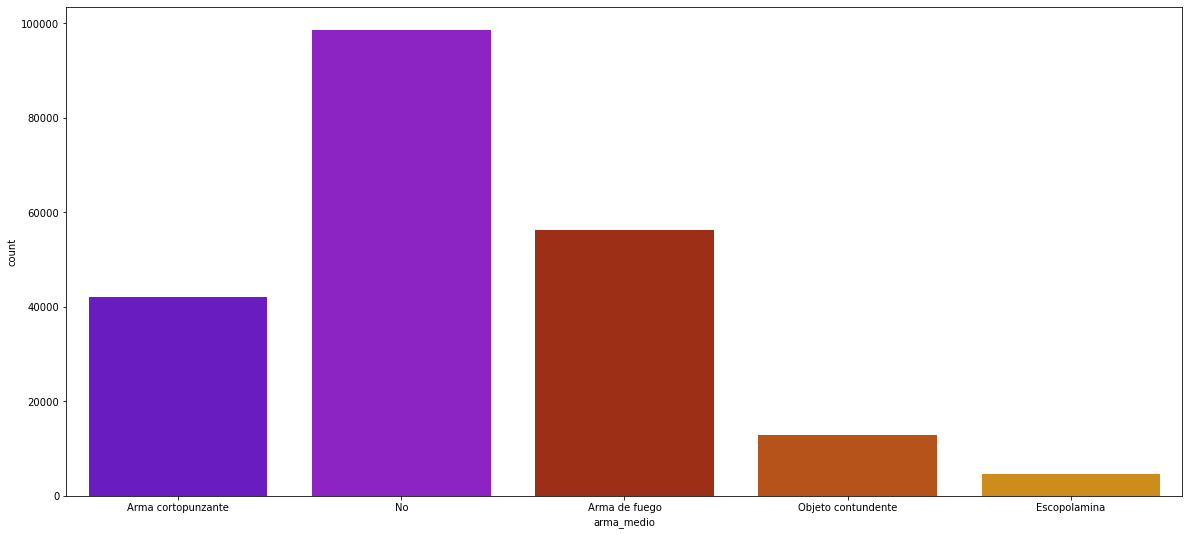

In [8]:
plt.rcParams['figure.figsize'] = (20, 9)
sns.countplot(data['arma_medio'], palette = 'gnuplot')

In [9]:
data.medio_transporte.value_counts()

Caminata                      160206
Automóvil                      22152
Motocicleta                     9252
Autobus                         7917
Taxi                            6683
Metro                           4845
Bicicleta                       2334
Motocicleta con parrillero       938
Planeador                         11
Name: medio_transporte, dtype: int64

In [10]:
data = data[~data.medio_transporte.isin(['Planeador'])]

<function matplotlib.pyplot.show(close=None, block=None)>

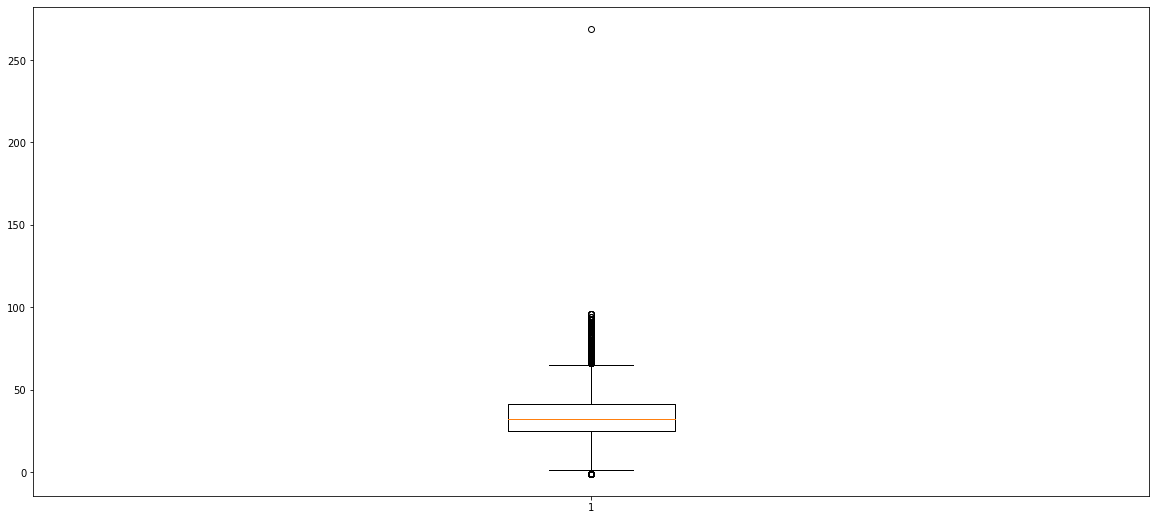

In [11]:
plt.boxplot(data.edad)
plt.show

In [12]:
data = data[(data["edad"]<110) & (data["edad"]>10)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213070 entries, 0 to 248935
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   latitud           213070 non-null  float64
 1   longitud          213070 non-null  float64
 2   sexo              213070 non-null  object 
 3   edad              213070 non-null  int64  
 4   medio_transporte  213070 non-null  object 
 5   modalidad         213070 non-null  object 
 6   arma_medio        213070 non-null  object 
 7   codigo_barrio     213070 non-null  object 
 8   codigo_comuna     213070 non-null  float64
 9   lugar             213070 non-null  object 
 10  bien              213070 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 19.5+ MB


<AxesSubplot:>

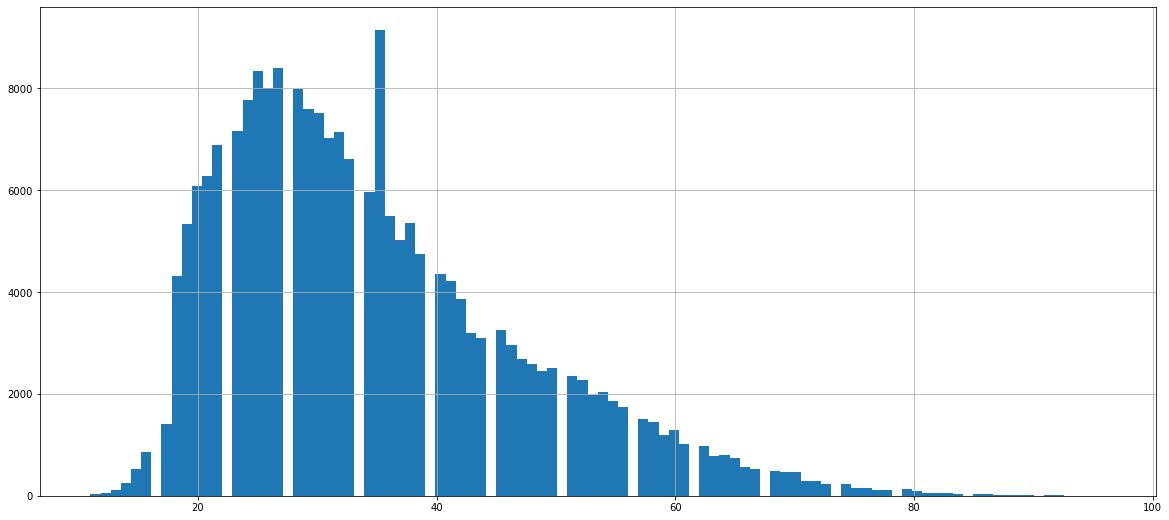

In [13]:
data.edad.hist(bins = 100)

D:\archivos_de_programa\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='codigo_comuna', ylabel='count'>

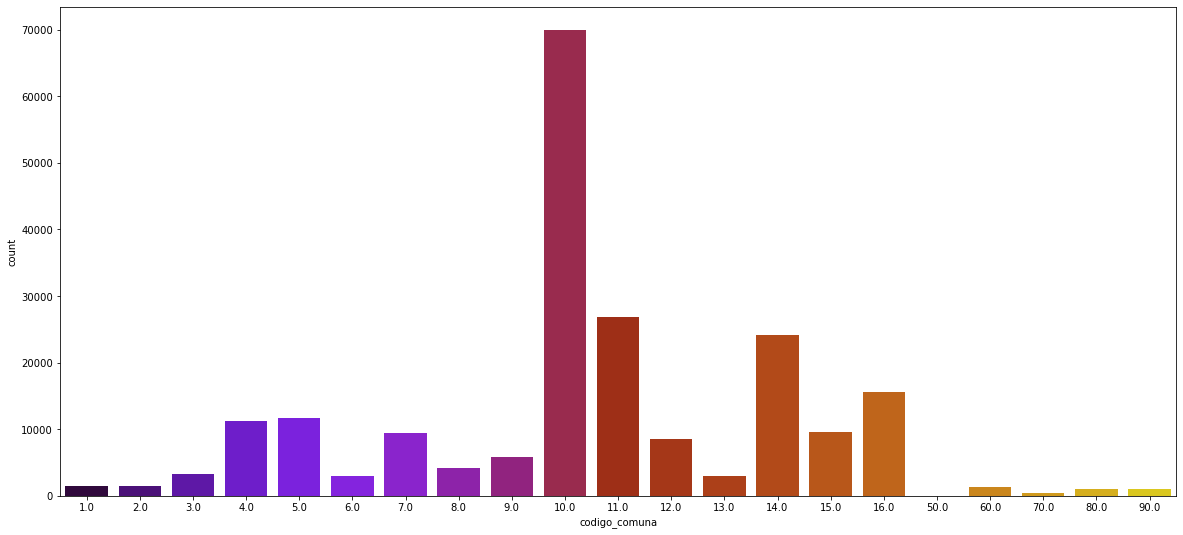

In [14]:
plt.rcParams['figure.figsize'] = (20, 9)
sns.countplot(data['codigo_comuna'], palette = 'gnuplot')

In [15]:
data.modalidad.value_counts().index

Index(['Atraco', 'Descuido', 'Cosquilleo', 'Raponazo', 'Engaño',
       'Rompimiento cerraduta', 'Escopolamina', 'Rompimiento de ventana',
       'Halado', 'Comisión de delito', 'Suplantación', 'Clonación de tarjeta',
       'Paquete chileno', 'Fleteo', 'Miedo o terror', 'Retención de tarjeta',
       'Abuso de confianza', 'Llave maestra', 'Simulando necesidad',
       'Llamada millonaria', 'Informático', 'Forcejeo', 'Retención de dinero',
       'Enfrentamiento con la fuerza pública', 'Vandalismo'],
      dtype='object')

In [16]:
final_labels = data.modalidad.value_counts()[data.modalidad.value_counts()>=1000]
data = data[data.modalidad.isin(final_labels.index)]

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210750 entries, 0 to 248935
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   latitud           210750 non-null  float64
 1   longitud          210750 non-null  float64
 2   sexo              210750 non-null  object 
 3   edad              210750 non-null  int64  
 4   medio_transporte  210750 non-null  object 
 5   modalidad         210750 non-null  object 
 6   arma_medio        210750 non-null  object 
 7   codigo_barrio     210750 non-null  object 
 8   codigo_comuna     210750 non-null  float64
 9   lugar             210750 non-null  object 
 10  bien              210750 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 19.3+ MB


In [18]:
data_labels = data["modalidad"]
data = data.drop("modalidad",axis = 1)

## transformación de los datos

In [19]:
cat = ["sexo","medio_transporte","arma_medio","codigo_barrio","lugar","bien"]
num = ["latitud", "longitud", "edad", "codigo_comuna"]

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

full_pipeline = ColumnTransformer([
    ("cat", OneHotEncoder(), cat),
    ("num", StandardScaler(), num)
])

In [21]:
data_prepared = full_pipeline.fit_transform(data)

## training process

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(data_prepared, data_labels)


In [27]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X_train, y_train)
print('R-squared test score: {:.3f}'
     .format(tree.score(X_test, y_test)))
print('R-squared train score: {:.3f}'
     .format(tree.score(X_train, y_train)))

R-squared test score: 0.778
R-squared train score: 1.000


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(max_depth = 50).fit(X_train, y_train)
print('R-squared test score: {:.3f}'
     .format(tree1.score(X_test, y_test)))
print('R-squared train score: {:.3f}'
     .format(tree1.score(X_train, y_train)))